## 练习 2-5
对频谱进行修改：将频谱的每个元素幅值除以其对应的频率值（零频率处设为0），使用方波，三角波和锯齿波尝试，试听修改过后的声音信号，这个操作对信号会有什么影响？

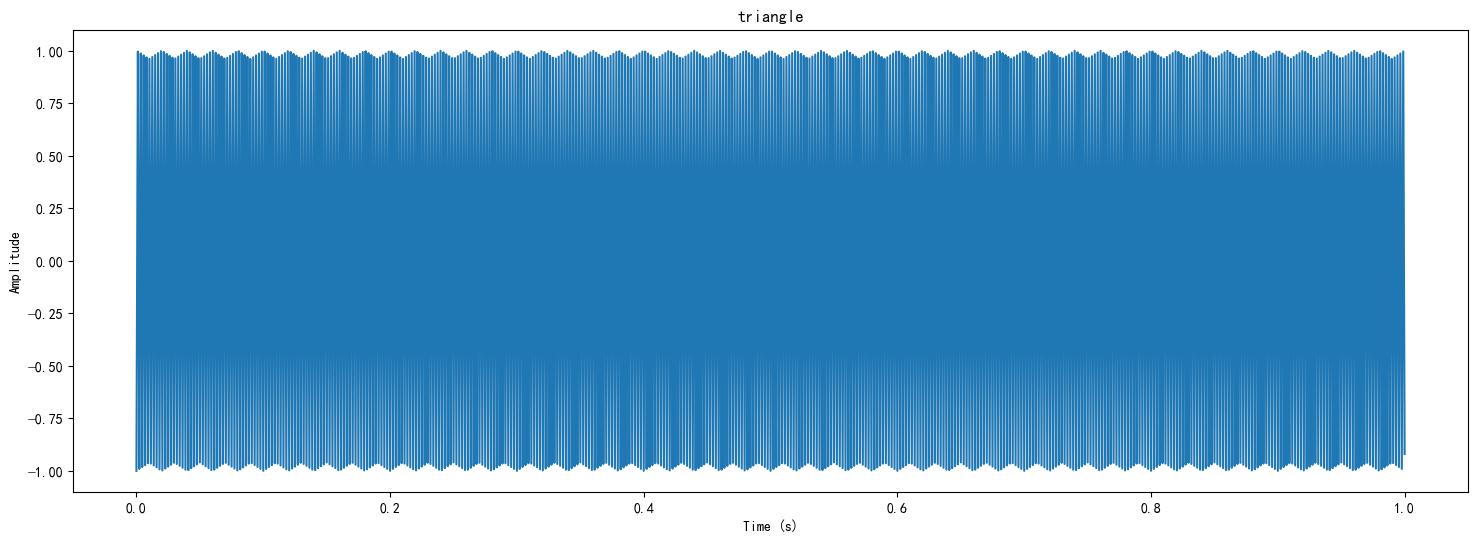

In [10]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from IPython.display import Audio

# 设置中文字体
plt.rcParams["font.family"] = ["SimHei", "Times New Roman"]  # 使用系统中存在的字体（可叠加）

# 三角波信号
duration = 1  # 信号持续时间（秒）
sample_rate = 22050  # 采样率（Hz）
base_freq = 440  # 频率
amplitude = 1  # 振幅

# 生成时间序列
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
# 生成信号
tri_signal = amplitude * signal.sawtooth(2 * np.pi * base_freq * t, 0.5)

plt.figure(figsize=(18, 6))
plt.plot(t, tri_signal)
plt.title('triangle')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.show()
# 频谱
n_fft = 1000  # FFT窗口大小
tri_spec = np.fft.rfft(tri_signal, n=n_fft)  # 加直流偏离，对应频谱上f=0的值
amplitude = np.abs(tri_spec)  # 幅度谱
frequency = np.fft.rfftfreq(n_fft, d=1 / sample_rate)  # 频率轴

amplitude_mod = amplitude[1:]*500/frequency[1:]
# amplitude_mod[0] = 0
tri_signal_mod = np.fft.irfft(amplitude_mod, n=duration*sample_rate)

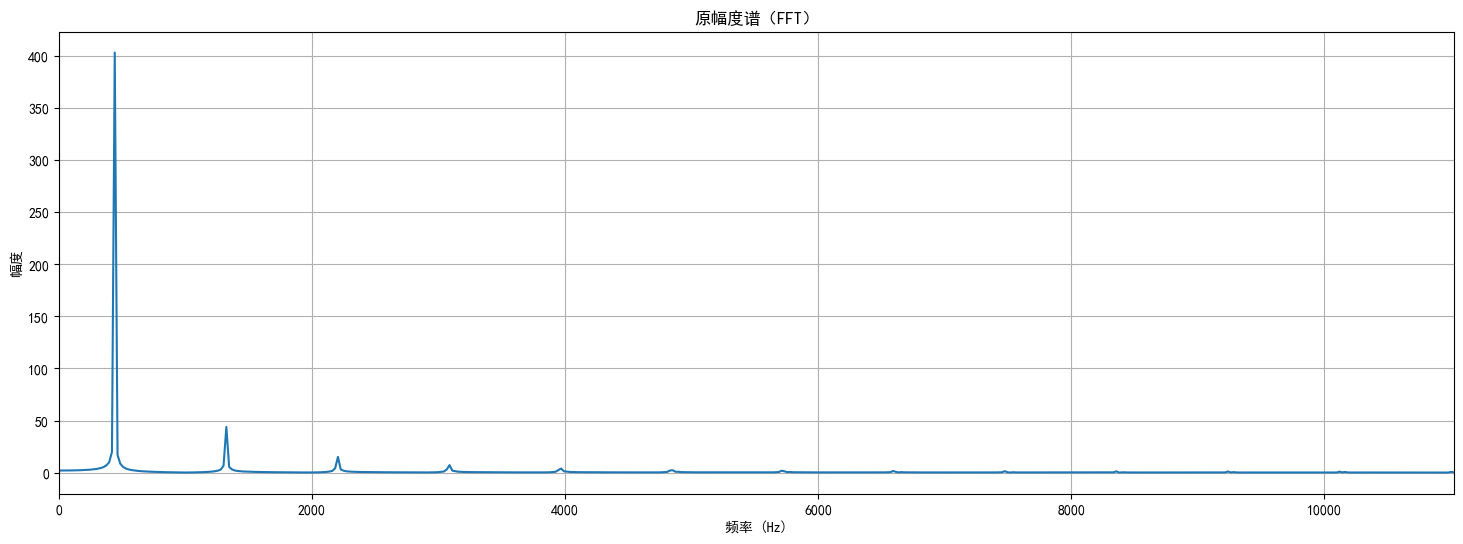

In [11]:
# 绘制幅度谱
plt.figure(figsize=(18, 6))
plt.plot(frequency, amplitude)
plt.title('原幅度谱（FFT）')
plt.xlabel('频率 (Hz)')
plt.ylabel('幅度')
plt.grid(True)
plt.xlim(0, sample_rate / 2)
plt.show()
Audio(tri_signal, rate=2*sample_rate)

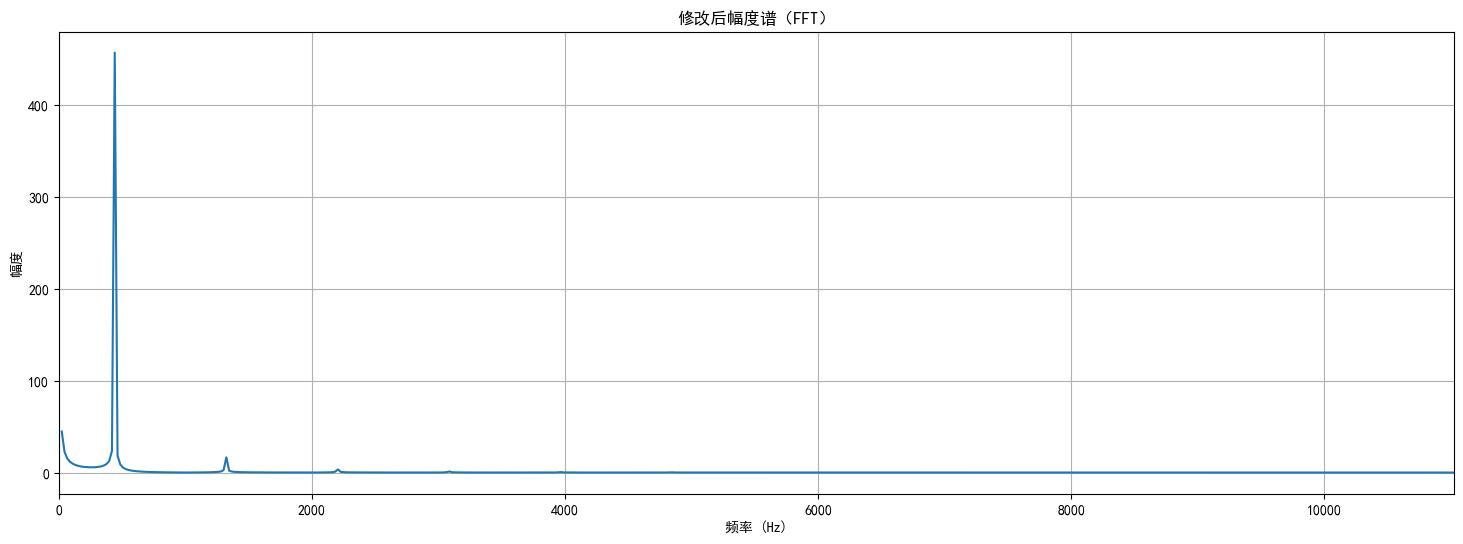

In [21]:
# 绘制幅度谱
plt.figure(figsize=(18, 6))
plt.plot(frequency[1:], amplitude_mod)
plt.title('修改后幅度谱（FFT）')
plt.xlabel('频率 (Hz)')
plt.ylabel('幅度')
plt.grid(True)
plt.xlim(0, sample_rate / 2)
plt.show()
Audio(tri_signal_mod, rate=2*sample_rate)

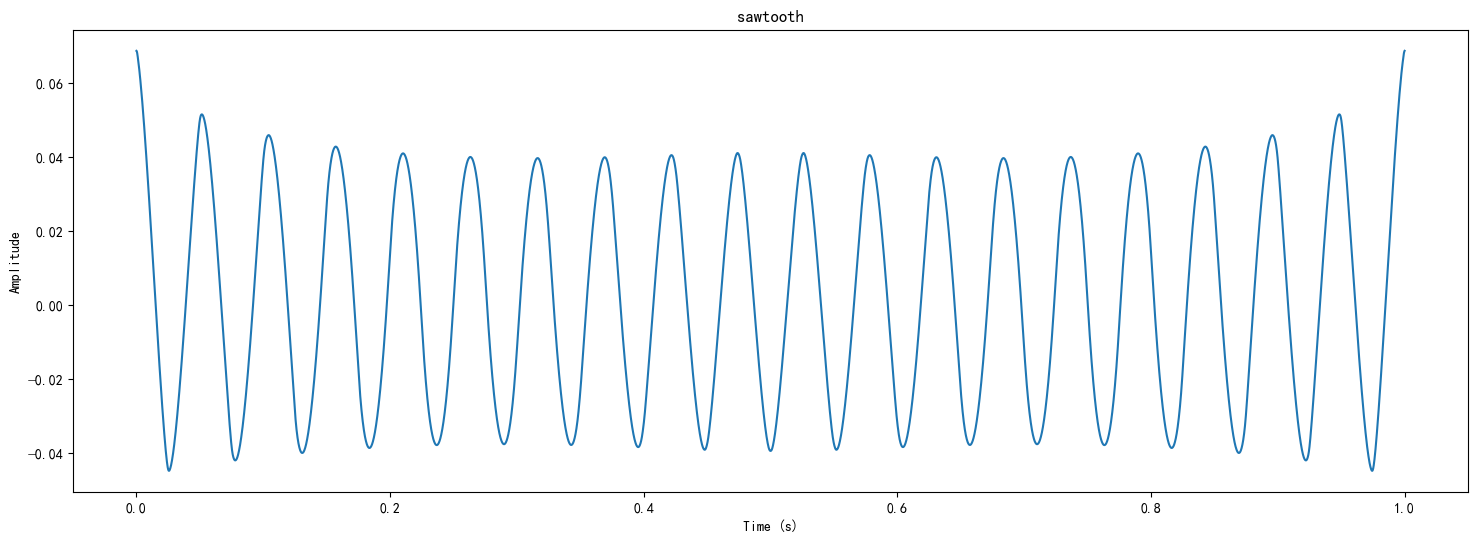

In [17]:
plt.figure(figsize=(18, 6))
plt.plot(t, tri_signal_mod)
plt.title('sawtooth')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.show()

经过处理的锯齿波信号高频部分被极大削减，只保留部分低频分量，波形类似正弦波，幅值非常小；并且听下来感觉只有100Hz以内的低频信号，并且也难以听到。